## **THE SPARKS FOUNDATION | DATA SCIENCE & BUSINESS ANALYTICS**
### **TASK 5 : Exploratory Data Analysis - Sports**

> * Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
* Suggest teams or players a company should endorse for its products.
* You can choose any of the tool of your choice (Python/R/Tableau/PowerBI/Excel/SAP/SAS)
* Dataset: https://bit.ly/34SRn3b

# Author : **PIYUSH SINGH | CSE | BIET JHANSI**


## **Import Libraries**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
os.getcwd()

'/content'

In [3]:
os.listdir()

['.config', 'drive', 'sample_data']

## **Loading Dataset**

## **Matches Dataset**

In [4]:
matches=pd.read_csv('/content/drive/MyDrive/GRIP_task_5/matches.csv')

In [5]:
matches.shape

(756, 18)

In [6]:
matches.head(7)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [7]:
matches.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

## **Check for Missing Values**

In [8]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [9]:
matches[matches['winner'].isnull()].index

Int64Index([300, 545, 570, 744], dtype='int64')

**Drop the rows where winner is not declared**

In [10]:
matches.drop(matches[matches['winner'].isnull()].index, inplace = True) 
matches.shape

(752, 18)

**Umpire 3 column is Dropped**

In [11]:
matches.drop(['umpire3'], axis=1 ,inplace=True)
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [12]:
matches.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            2
umpire2            2
dtype: int64

### All teams played so far

In [13]:
allteams=matches['team1'].unique()
allteams

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

**'Rising Pune Supergiant' and 'Rising Pune Supergiants'  , 'Delhi Capitals' and 'Delhi Daredevils' are same teams**

In [14]:
matches=matches.replace(['Rising Pune Supergiant','Delhi Daredevils'],['Rising Pune Supergiants','Delhi Capitals'])
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


Text(0.5, 1.0, 'Number of Matches in a Season')

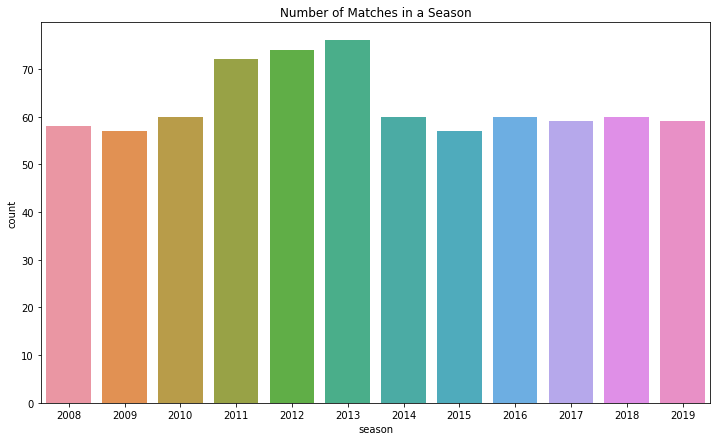

In [15]:
plt.figure(figsize=(12, 7))
sns.countplot(data=matches,x='season')
plt.title('Number of Matches in a Season')

**2013 , 2012 and 2011 have the most number of matches in respective order**

Text(0.5, 1.0, 'Teams in Seasons')

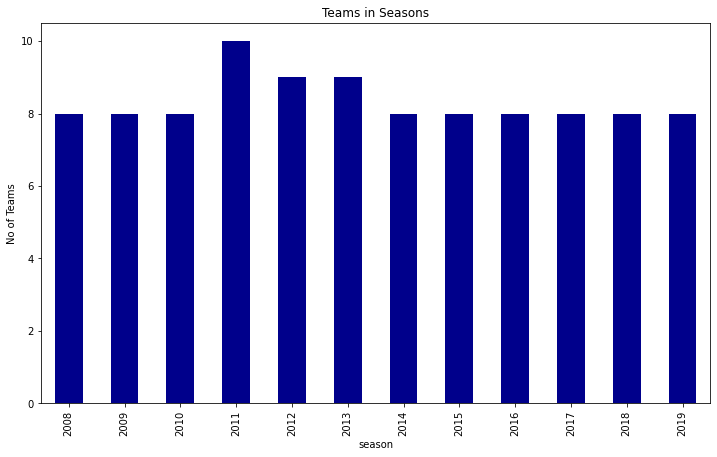

In [16]:
plt.figure(figsize=(12, 7))
matches.groupby('season')['team1'].nunique().plot.bar(color='darkblue')
plt.ylabel('No of Teams')
plt.title('Teams in Seasons')

**2011 has most no of Teams i.e 10**

Text(0.5, 1.0, 'Number of Matches a team Won')

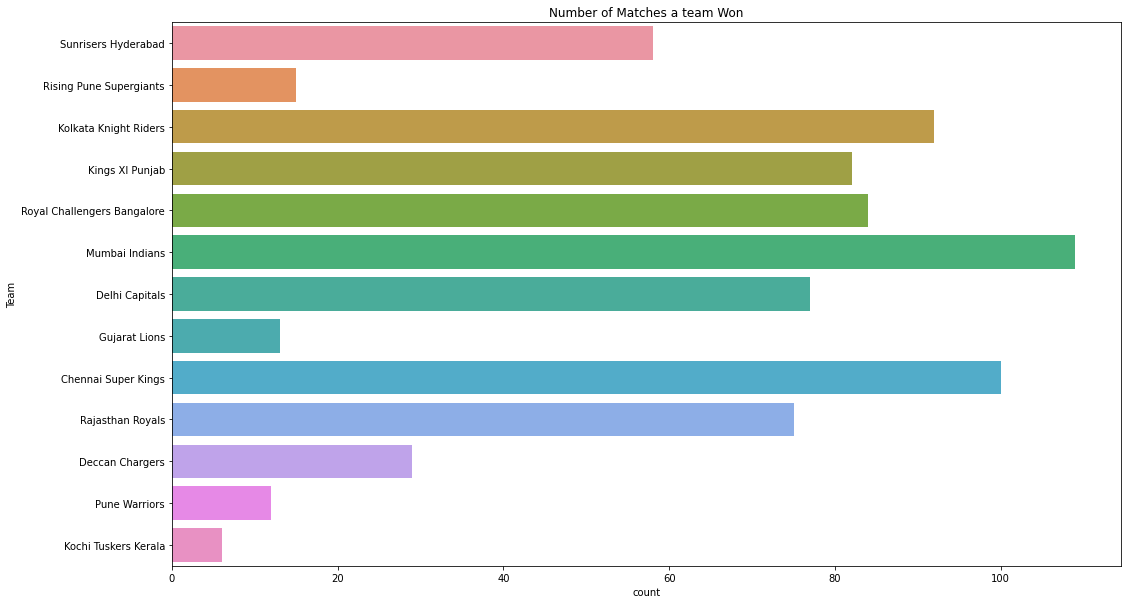

In [17]:
plt.figure(figsize=(17, 10))
sns.countplot(data=matches,y='winner',orient='h')
plt.ylabel('Team')
plt.title('Number of Matches a team Won')

## **MUMBAI INDIANS followed by CHENNAI SUPER KINGS are most successful teams**

Text(0.5, 1.0, 'Number of Matches played on a Venue')

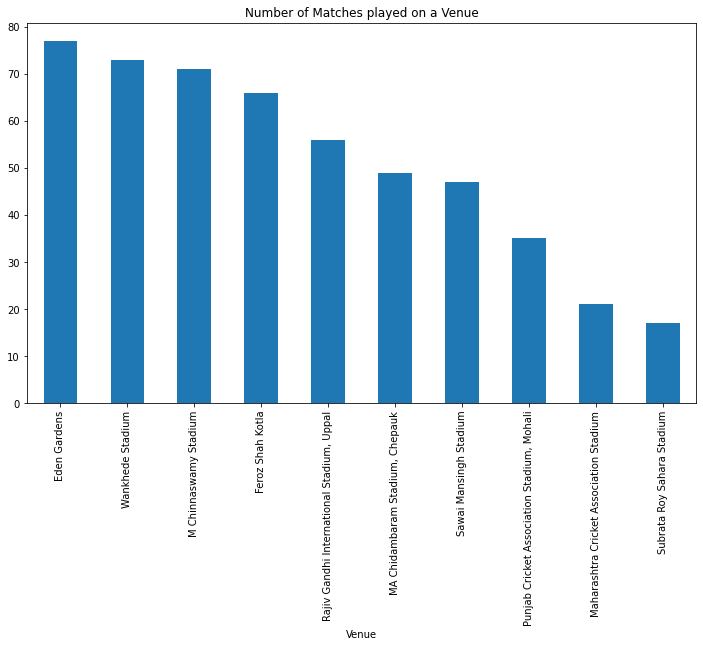

In [18]:
plt.figure(figsize=(12, 7))
all_venues=matches['venue'].value_counts().head(10)
all_venues.plot.bar()
plt.xlabel('Venue')
plt.title('Number of Matches played on a Venue')

**Eden Garden , Wankhede Stadium and M Chinnaswamy Stadium have hosted most the most number of matches**

Text(0.5, 1.0, 'Toss won by a Team')

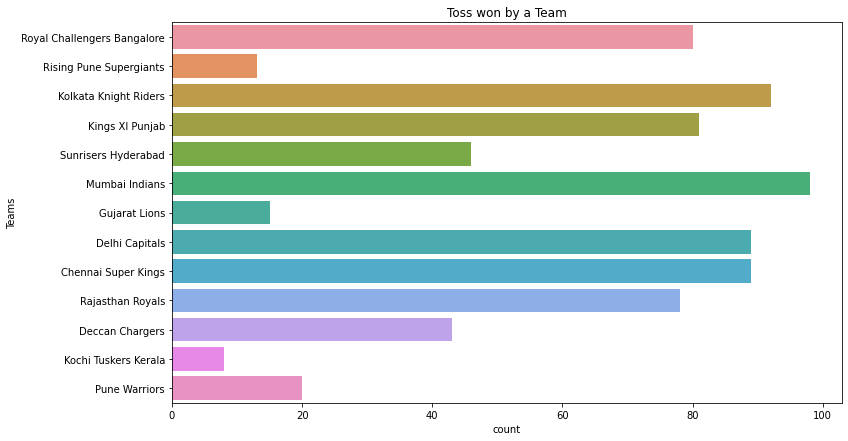

In [19]:
plt.figure(figsize=(12, 7))
sns.countplot(y='toss_winner',data=matches,orient='V')
plt.ylabel('Teams')
plt.title('Toss won by a Team')

**MI and KKR are good at wining TOSS**

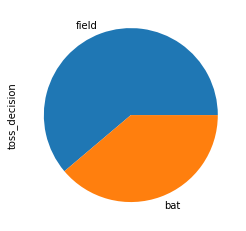

In [20]:
matches['toss_decision'].value_counts().plot.pie()

**Most Teams opted to Field first** 

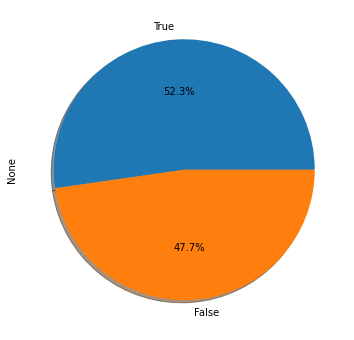

In [21]:
wins = matches['toss_winner'] == matches['winner']
ax5= wins.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6),shadow=True)

**Winning and Losing Toss doesn't affected the Match Results**

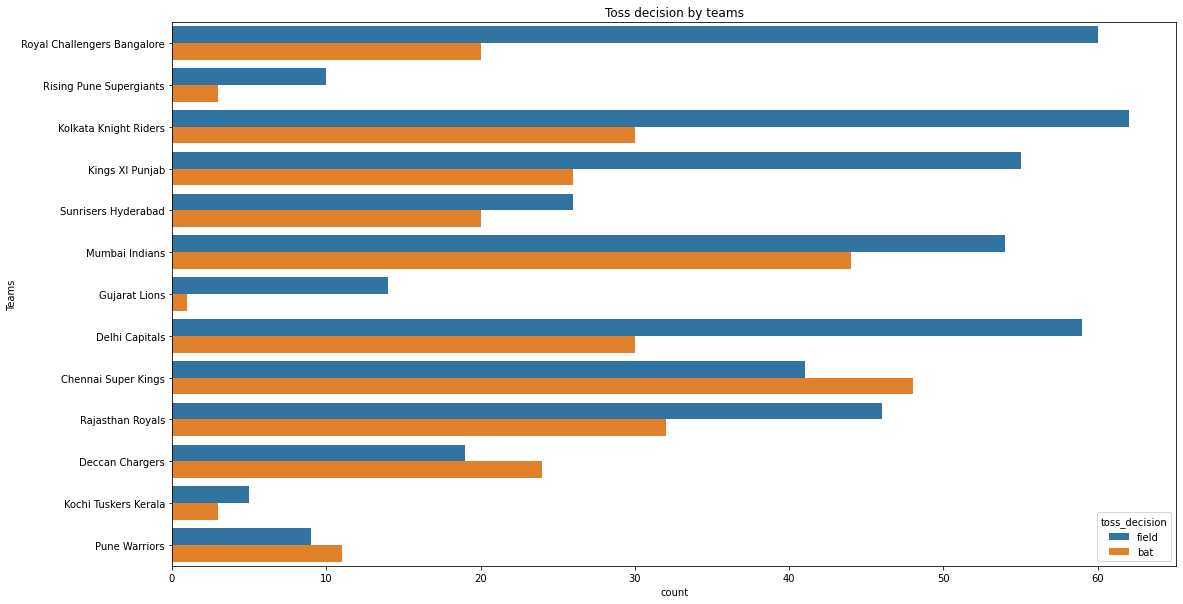

In [22]:
plt.figure(figsize=(18, 10))
sns.countplot(y='toss_winner',data=matches,hue='toss_decision',orient='V')
plt.ylabel('Teams')
plt.title('Toss decision by teams')
print()


*   **RCB and KKR has opted mostly for Fielding**
*    **CSK opted for Batting mostly**







Text(0.5, 1.0, 'Team Win Percentage')

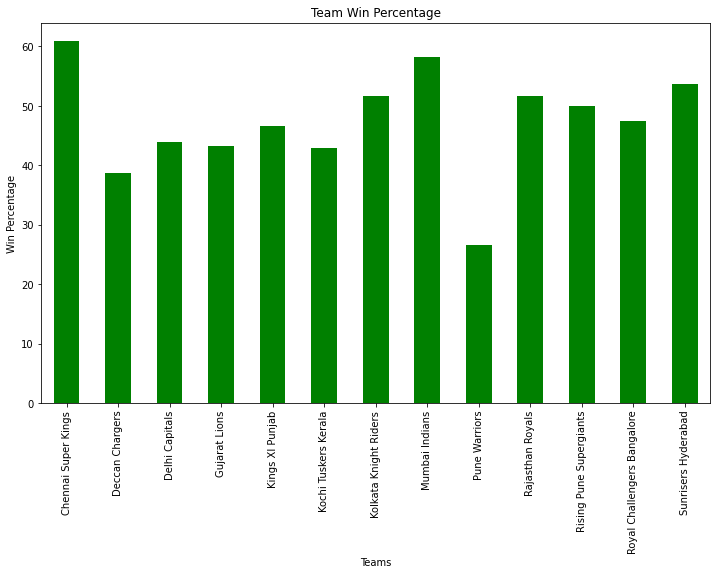

In [23]:
team_total_match=(matches['winner'].value_counts()/(matches['team1'].value_counts()+matches['team2'].value_counts()))*100
plt.figure(figsize=(12, 7))
team_total_match.plot.bar(color='green')
plt.xlabel('Teams')
plt.ylabel('Win Percentage')
plt.title('Team Win Percentage')




*  **Chennai Super Kings, Mumbai Indians and Sunrisers Hyderabad has highest win percentage**



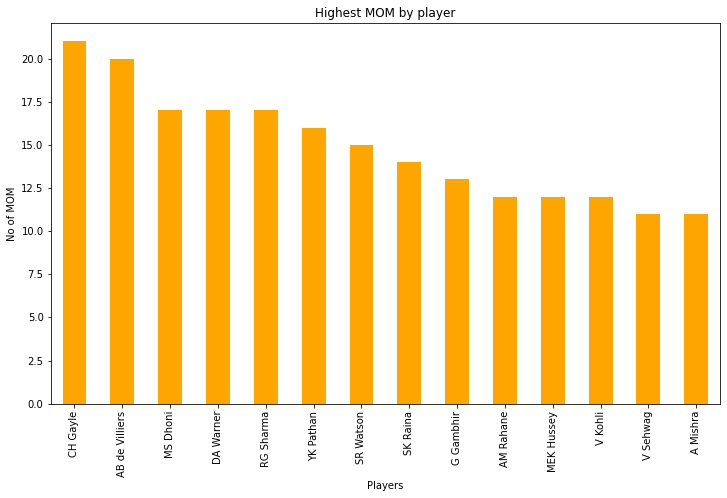

In [24]:
player_of_match=matches['player_of_match'].value_counts().head(14)
plt.figure(figsize=(12, 7))
player_of_match.plot.bar(color='orange')
plt.xlabel('Players')
plt.ylabel('No of MOM')
plt.title('Highest MOM by player')
print()



*   **Chris Gayle , AB de Villiers have got most Man of the match Award**
*   **MS Dhoni , RG Sharma and DA Warner got 16 Man of Match Awards**



# **Deliveries** **DataSet**

In [25]:
delivery=pd.read_csv('/content/drive/MyDrive/GRIP_task_5/deliveries.csv')

In [26]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [27]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [28]:
delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

### DATA CLEANING

In [29]:
delivery=delivery.replace(['Rising Pune Supergiant','Delhi Daredevils'],['Rising Pune Supergiants','Delhi Capitals'])

In [30]:
delivery['player_dismissed'].value_counts().head(10)

SK Raina      162
RG Sharma     155
RV Uthappa    153
V Kohli       143
S Dhawan      137
G Gambhir     136
KD Karthik    135
PA Patel      126
AM Rahane     116
SR Watson     115
Name: player_dismissed, dtype: int64


*   **Suresh Raina , RG Sharma and RV uthappa are dismissed  most of the time as a batsman**





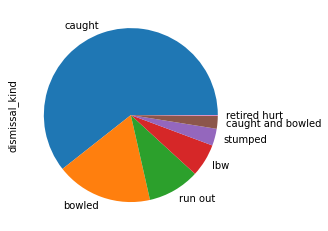

In [31]:
delivery['dismissal_kind'].value_counts().head(7).plot.pie()



*   **Caught Out followed by Bowled are most common Dismissal Kind**




In [32]:
delivery['fielder'].value_counts().head(10)

MS Dhoni          159
KD Karthik        152
RV Uthappa        125
SK Raina          115
AB de Villiers    114
PA Patel           97
RG Sharma          92
V Kohli            90
KA Pollard         85
NV Ojha            82
Name: fielder, dtype: int64



*   **MS Dhoni and KD Karthik are best Wicket-Kipper**
*   **SK Raina , RG Sharma and V Kohli are best Fielders**



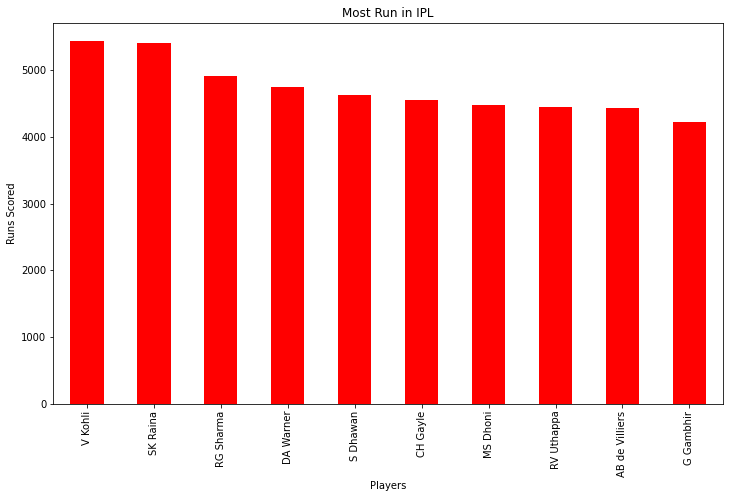

In [33]:

plt.figure(figsize=(12, 7))
delivery.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10).plot.bar(color='red')

plt.xlabel('Players')
plt.ylabel('Runs Scored')
plt.title('Most Run in IPL')
print()



*   **Virat Kohli and SK Raina have most run in IPL**
*   **RG Sharma , DA Warner and S Dhawan are also next in top 3**



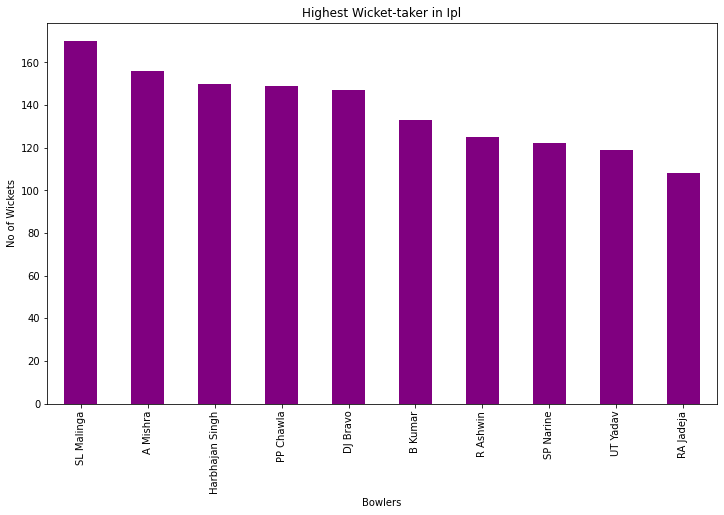

In [34]:
plt.figure(figsize=(12, 7))
most_wickets=delivery[(delivery['dismissal_kind']=='bowled')|(delivery['dismissal_kind']=='stumped')|(delivery['dismissal_kind']=='caught')|(delivery['dismissal_kind']=='lbw')|(delivery['dismissal_kind']=='caught and bowled')|(delivery['dismissal_kind']=='hit wicket')]
most_wickets.groupby('bowler')['bowler'].count().sort_values(ascending=False).head(10).plot.bar(color='purple')
plt.xlabel('Bowlers')
plt.ylabel('No of Wickets')
plt.title('Highest Wicket-taker in Ipl')
print()



1.   **SL MALINGA is the most succesful fast bowler and overall as well**
2.   **Amit Mishra is most successful spinner**



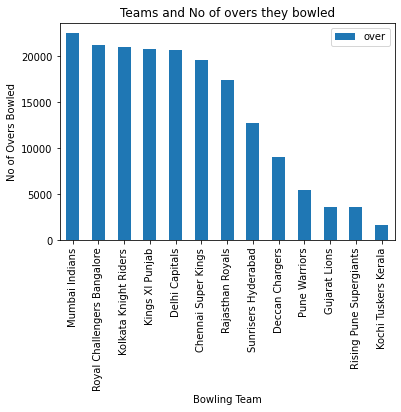

In [35]:

x=pd.DataFrame(delivery.groupby('bowling_team')['over'].count().sort_values(ascending=False))
x.plot.bar()
plt.xlabel('Bowling Team')
plt.ylabel('No of Overs Bowled')
plt.title('Teams and No of overs they bowled')
print()

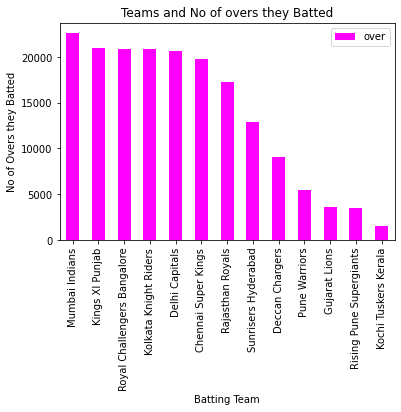

In [36]:
y=pd.DataFrame(delivery.groupby('batting_team')['over'].count().sort_values(ascending=False))

y.plot.bar(color='magenta')
plt.xlabel('Batting Team')
plt.ylabel('No of Overs they Batted')
plt.title('Teams and No of overs they Batted')
print()



*   **MI and RCB bowled most no of overs in IPL**
*   **MI and Kings XI Punjab batted most no of overs**



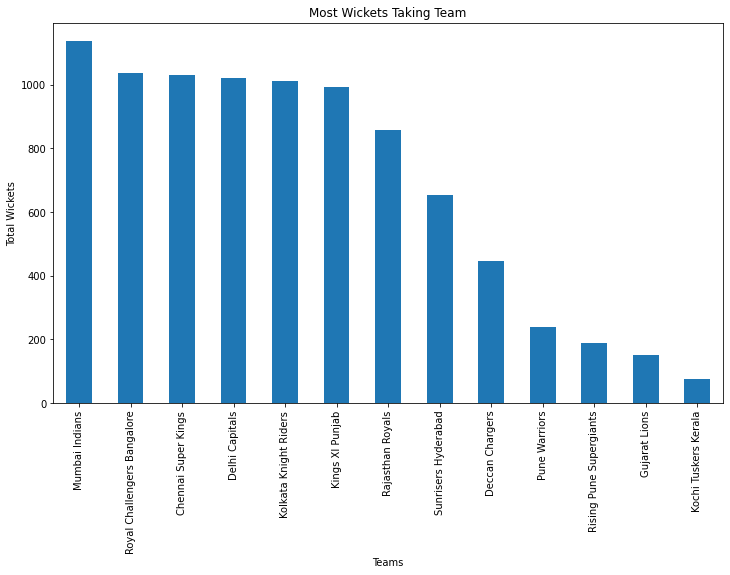

In [37]:

most_wickets_by_team=delivery.groupby('bowling_team')['player_dismissed']
plt.figure(figsize=(12, 7))
most_wickets_by_team.count().sort_values(ascending=False).plot.bar()
plt.xlabel('Teams')
plt.ylabel('Total Wickets')
plt.title('Most Wickets Taking Team')
print()


Text(0.5, 1.0, 'Matches played by Teams')

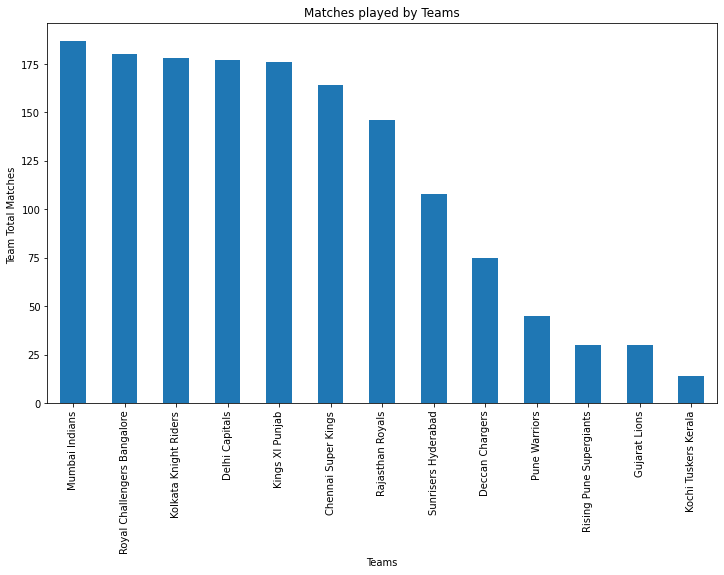

In [38]:
most_matches=delivery.groupby('batting_team')['match_id'].nunique()
plt.figure(figsize=(12, 7))
most_matches.sort_values(ascending=False).plot.bar()

plt.xlabel('Teams')
plt.ylabel('Team Total Matches ')
plt.title('Matches played by Teams')

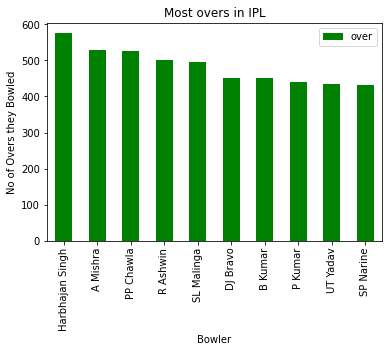

In [39]:

pd.DataFrame((delivery.groupby('bowler')['over'].count()//6).sort_values(ascending=False)).head(10).plot.bar(color='green')
plt.xlabel('Bowler')
plt.ylabel('No of Overs they Bowled')
plt.title('Most overs in IPL')
print()

**Harbhajan Singh , Amit Mishra and Piyush Chawla has bowled most no of overs**

Text(0.5, 1.0, 'Extra Runs')

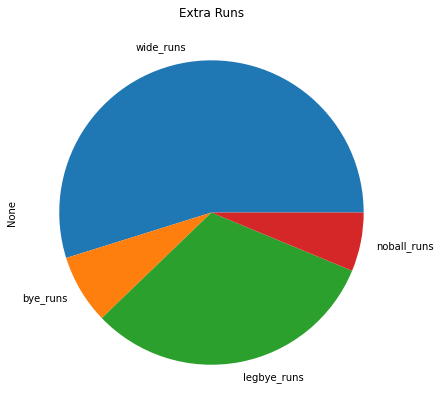

In [40]:
extra=pd.DataFrame(delivery[['wide_runs','bye_runs','legbye_runs','noball_runs']])
plt.figure(figsize=(12, 7))
extra.sum(axis=0).plot.pie()
# plt.xlabel('Extra Runs Categories')
# plt.ylabel('Runs')
plt.title('Extra Runs')



*   **Wide Runs and Legbye Runs costed more for Bowlers**




In [41]:
delivery.groupby('bowler')['wide_runs'].sum().sort_values(ascending=False).head(10)

bowler
SL Malinga     152
P Kumar        144
DJ Bravo       124
R Ashwin       111
UT Yadav       110
B Kumar        110
DW Steyn       105
DS Kulkarni     99
SR Watson       98
I Sharma        96
Name: wide_runs, dtype: int64

In [42]:
delivery.groupby('bowler')['noball_runs'].sum().sort_values(ascending=False).head(10)

bowler
S Sreesanth    27
JJ Bumrah      23
I Sharma       21
A Mishra       20
SL Malinga     20
UT Yadav       19
JA Morkel      18
AB Dinda       14
SW Tait        14
SR Watson      13
Name: noball_runs, dtype: int64

* **SL MALINGA and P kumar had given most number of Wide-bowl**
* **S Sreesanth and J Bumrah has given most no of No-balls**

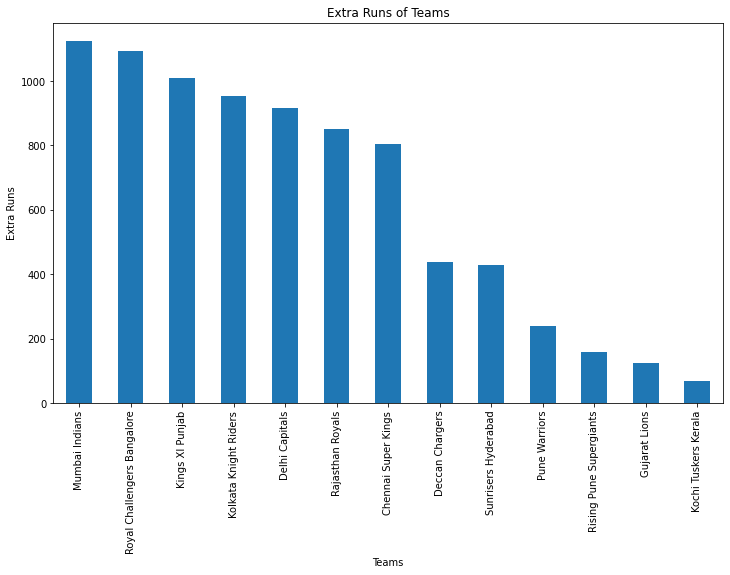

In [43]:
extras_by_teams=delivery.groupby('bowling_team')['noball_runs'].sum().sort_values(ascending=False)+delivery.groupby('bowling_team')['wide_runs'].sum().sort_values(ascending=False)+delivery.groupby('bowling_team')['bye_runs'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 7))
extras_by_teams.sort_values(ascending=False).plot.bar()
plt.xlabel('Teams')
plt.ylabel( 'Extra Runs')
plt.title('Extra Runs of Teams')
print()

## **SUMMARY**

## **Part 1 -: Team**


> *   2013 , 2012 had  most number of matches
* 2011 has most no of Teams i.e 10
*   Eden Garden , Wankhede Stadium and M Chinnaswamy Stadium have hosted most the most number of matches
* **Mumbai Indians** and **Kolkata KnightRiders** have won most no of Toss
* Team Winning the toss has winning percentage of 53% and and in case of lossing toss it stands as 47%
* Royal Challengers Banglore and Kolkata KnightRiders has opted mostly for Fielding
* Chennai Super Kings opted for Batting mostly
*   **Mumbai Indians** and **Royal Challengers Banglore** bowled most no of overs in IPL
*   **Mumbai Indians** and **Kings XI Punjab** batted most no of overs
* **Chennai Super Kings**, **Mumbai Indians** and **Sunrisers Hyderabad** has highest win percentage
* **MUMBAI INDIANS** followed by **CHENNAI SUPER KINGS** are most successful teams
* **MUMBAI INDIANS**  has played most number of matches
* **MUMBAI INDIANS** and **Royal Challengers Banglore**  has given most number of Extra Runs
## **Part 2 : Players**

> * **Chris Gayle , AB de Villiers** have got most Man of the match Award
* **Virat Kohli** and **SK Raina** have most run in IPL
* **RG Sharma**, **DA Warner** and **S Dhawan** are also next in top 3
*   **MS Dhoni** and **KD Karthik** are best Wicket-Kipper
*   **SK Raina , RG Sharma and V Kohli** are best Fielders
*  **SL MALINGA** is the most succesful **fast bowler and overall as well**
*  **Amit Mishra** is most successful **spinner**
* **Harbhajan Singh** , **Amit Mishra** and **Piyush Chawla** has bowled most no of overs.
*   **Caught Out** followed by **Bowled** are most common Dismissal Kind
* **SL MALINGA** and **P kumar** had given most number of **Wide-bowl**
* **S Sreesanth** and **J Bumrah** has given most no of **No-balls**








## **THANK YOU**